<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/BT_ANN_HOA_MONAN_KHUONMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


link google drive **nhận dạng 4 loại hoa**: https://drive.google.com/drive/folders/1Y0DSrF8QBMKF6QMHap6aAiNwJ90hb6_3?usp=sharing

In [30]:
from keras import datasets, Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image

import numpy as np
import os

hoa = ['hoacuc','hoamattroi','hoathuocduoc','hoavantho']
dir_train = '/content/drive/MyDrive/Hoa' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in hoa:
    path = os.path.join(dir,i)
    index_label = hoa.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      # img = img.reshape(150,150) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
x_train = x_train.reshape(84,150*150*3)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) 
print(y_train.shape)

(84, 67500)
(84, 4)


In [31]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(256, activation='relu', name='layer2'))
model.add(Dense(128, activation='relu', name='layer3'))
model.add(Dense(4, activation='softmax', name='layer4'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 4)                 516       
                                                                 
Total params: 34,725,252
Trainable params: 34,725,252
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 20)
model.save('hoa.h5')

Epoch 1/20
3/3 [==============================] - 0s 14ms/step - loss: 13.1738 - accuracy: 0.2976
Epoch 2/20
3/3 [==============================] - 0s 14ms/step - loss: 25.3608 - accuracy: 0.2500
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 7.7376 - accuracy: 0.4048
Epoch 4/20
3/3 [==============================] - 0s 14ms/step - loss: 9.6185 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 14ms/step - loss: 4.1457 - accuracy: 0.5714
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 3.2567 - accuracy: 0.6786
Epoch 7/20
3/3 [==============================] - 0s 13ms/step - loss: 2.6774 - accuracy: 0.6905
Epoch 8/20
3/3 [==============================] - 0s 14ms/step - loss: 1.9461 - accuracy: 0.7976
Epoch 9/20
3/3 [==============================] - 0s 14ms/step - loss: 1.8203 - accuracy: 0.7143
Epoch 10/20
3/3 [==============================] - 0s 13ms/step - loss: 2.1972 - accuracy: 0.6905
Epoch 11/20
3/3 [==========

In [33]:
score_train = model.evaluate(x_train, y_train)
print('do chinh xac',score_train)

3/3 [==============================] - 0s 7ms/step - loss: 0.2031 - accuracy: 0.9643
do chinh xac [0.20307180285453796, 0.9642857313156128]


1/1 [==============================] - 0s 95ms/step
hoamattroi


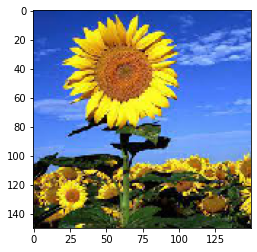

In [34]:
pic = load_img('/content/hoamattroi.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

In [35]:
pic = load_img('/content/cuc.jpg', target_size=(150,150)) 
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

1/1 [==============================] - 0s 14ms/step
hoacuc


1/1 [==============================] - 0s 101ms/step
hoathuocduoc


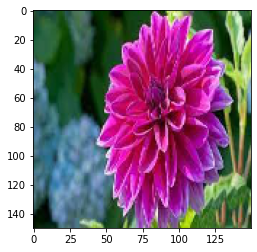

In [36]:
pic = load_img('/content/thuocduoc.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

1/1 [==============================] - 0s 20ms/step
hoavantho


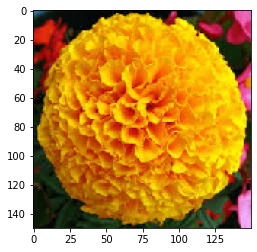

In [39]:
pic = load_img('/content/tho.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

Link drive **nhận dạng 3 người:**https://drive.google.com/drive/folders/1M24uPWi3cvNaBdl0DCIkGRDsCh-Op1h6?usp=sharing

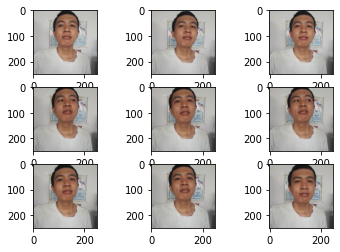

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras import datasets, Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image
import numpy as np
import os

folder= '/content/drive/MyDrive/NhanDangKhuonMat/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanAnhTuan'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [6]:
from os import listdir
from numpy import asarray
from numpy import save


photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanAnhTuan'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanPhuocTho'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanTienDat'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
photos = photos.reshape(58,150*150*3)
labels = asarray(labels)
labels = np_utils.to_categorical(labels)
print(photos.shape,labels.shape)


(58, 67500) (58, 3)


In [7]:
model2 = Sequential()
model2.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model2.add(Dense(256, activation='relu', name='layer2'))
model2.add(Dense(128, activation='relu', name='layer3'))
model2.add(Dense(3, activation='softmax', name='layer4'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 3)                 387       
                                                                 
Total params: 34,725,123
Trainable params: 34,725,123
Non-trainable params: 0
_________________________________________________________________


In [8]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(photos, labels,epochs = 20)
model2.save('khuonmat.h5')

Epoch 1/20
2/2 [==============================] - 3s 20ms/step - loss: 12777.4346 - accuracy: 0.2586
Epoch 2/20
2/2 [==============================] - 0s 19ms/step - loss: 11841.0029 - accuracy: 0.4310
Epoch 3/20
2/2 [==============================] - 0s 16ms/step - loss: 4593.7480 - accuracy: 0.3448
Epoch 4/20
2/2 [==============================] - 0s 16ms/step - loss: 1651.7723 - accuracy: 0.8103
Epoch 5/20
2/2 [==============================] - 0s 17ms/step - loss: 637.3934 - accuracy: 0.8276
Epoch 6/20
2/2 [==============================] - 0s 18ms/step - loss: 524.4432 - accuracy: 0.8103
Epoch 7/20
2/2 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
2/2 [==============================] - 0s 17ms/step - loss: 5.4804 - accuracy: 0.9655
Epoch 9/20
2/2 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000

In [9]:
score = model2.evaluate(photos, labels)
print('do chinh xac',score)

2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000
do chinh xac [0.0, 1.0]


1/1 [==============================] - 0s 18ms/step
BanAnhTuan


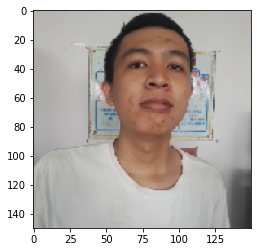

In [11]:
pic = load_img('/content/drive/MyDrive/NhanDangKhuonMat/BanAnhTuan2.bmp', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model2.predict(pic), axis=1))
ten = ['BanAnhTuan','BanPhuocTho','BanTienDat']
print(ten[a])

1/1 [==============================] - 0s 14ms/step
BanTienDat


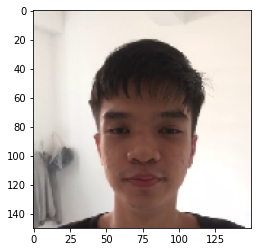

In [12]:
pic = load_img('/content/drive/MyDrive/NhanDangKhuonMat/BanTienDat18.bmp', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model2.predict(pic), axis=1))
ten = ['BanAnhTuan','BanPhuocTho','BanTienDat']
print(ten[a])

1/1 [==============================] - 0s 15ms/step
BanPhuocTho


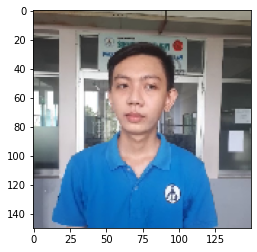

In [13]:
pic = load_img('/content/drive/MyDrive/NhanDangKhuonMat/BanPhuocTho1.bmp', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model2.predict(pic), axis=1))
ten = ['BanAnhTuan','BanPhuocTho','BanTienDat']
print(ten[a])

link drive **4 món ăn**: https://drive.google.com/drive/folders/1W6mVUscQ-cPkowOJtwYTHFWY9I_WuflG?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from keras import datasets, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image

import numpy as np
import os

mon = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
dir_train = '/content/drive/MyDrive/monan' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in mon:
    path = os.path.join(dir,i)
    index_label = mon.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      # img = img.reshape(150,150) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
x_train = x_train.reshape(100,150*150*3)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape)
print(y_train.shape)

(100, 67500)
(100, 5)


In [15]:
model3 = Sequential()
model3.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model3.add(Dense(256, activation='relu', name='layer2'))
model3.add(Dense(128, activation='relu', name='layer3'))
model3.add(Dense(5, activation='softmax', name='layer4'))
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 5)                 645       
                                                                 
Total params: 34,725,381
Trainable params: 34,725,381
Non-trainable params: 0
_________________________________________________________________


In [16]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model3.fit(x_train,y_train,epochs = 50)
model3.save('monan.h5')

Epoch 1/50
4/4 [==============================] - 0s 14ms/step - loss: 33.3762 - accuracy: 0.1700
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 36.4145 - accuracy: 0.1900
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 13.6255 - accuracy: 0.2900
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 9.5702 - accuracy: 0.2900
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 8.4569 - accuracy: 0.2700
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 3.7782 - accuracy: 0.3900
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 2.4958 - accuracy: 0.5000
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 4.3166 - accuracy: 0.3900
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 3.2061 - accuracy: 0.4300
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 4.2478 - accuracy: 0.3200
Epoch 11/50
4/4 [=========

In [17]:
score = model3.evaluate(x_train, y_train)
print('do chinh xac',score)

4/4 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 1.0000
do chinh xac [0.004097704775631428, 1.0]


1/1 [==============================] - 0s 16ms/step
banhmi


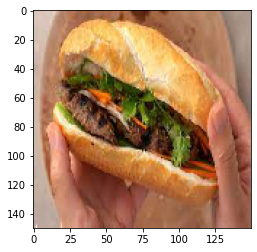

In [20]:
pic = load_img('/content/banhmi.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model3.predict(pic), axis=1))
print(classname[a])

1/1 [==============================] - 0s 16ms/step
banhbao


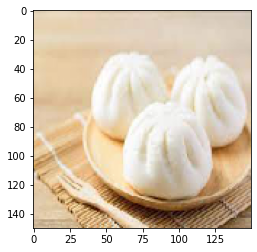

In [27]:
pic = load_img('/content/banhbao.jpg', target_size=(150,150))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model3.predict(pic), axis=1))
print(classname[a])

1/1 [==============================] - 0s 34ms/step
bunrieu


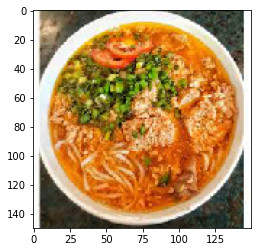

In [24]:
pic = load_img('/content/bun.jpg', target_size=(150,150))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model3.predict(pic), axis=1))
print(classname[a])

1/1 [==============================] - 0s 34ms/step
tomnuong


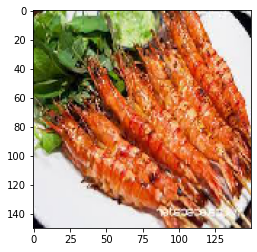

In [26]:
pic = load_img('/content/tom.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model3.predict(pic), axis=1))
print(classname[a])

1/1 [==============================] - 0s 15ms/step
banhcuon


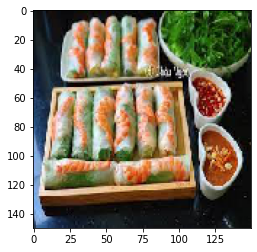

In [29]:
pic = load_img('/content/drive/MyDrive/monan/banhcuon/11.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model3.predict(pic), axis=1))
print(classname[a])